**DATASET SOURCE:** https://www.kaggle.com/datasets/prepinstaprime/employee-attrition-prediction/data

#### **Problem Statement**  
High attrition rates create challenges for businesses as it hampers recruitment efforts, negatively affects productivity, and redirect’s focus away from operational duties. To mitigate these challenges, we are working towards creating a predictive tool that helps identify high-risk workers based on demographics, work type and even satisfaction levels, ultimately allowing us to understand the key drivers of employee exit and retain the workers towards targeted efforts.

Objective:

The primary aim is to ascertain if a particular employee would choose to leave an organization, based on specific conditions catered towards age, job satisfaction, earnings, work-life balance, and other relevant qualities in the dataset. This examination will assist the organization in implementing strategies to lower and prevent high employee turnover rates.



#### **Importance of Addressing this Problem**
There are distinct benefits that come with lowering employee attrition rates:
- Cutbacks: The estimated cost of recruiting and training a fresh hire can be as high as the cost of employing them for a period of around 200%. This may be reduced by lowering attrition to merely twenty percent on a baseline, potentially saving the company hundreds of thousands of dollars every year.
- Higher Staff Satisfaction: Higher turnover rates creates dissatisfaction among the remaining members of the staff. Skilled and valuable employees need to be retained to ensure that the team remains united and motivated.
- Reduced Work Force Imbalance: The use of analytical data to plan the workforce helps in the proper placement of key individuals and to ensure critical positions are always occupied.




# **Task 2 - The Data**

#### **Dataset Overview:**
The dataset used for this project is the **HR Employee Attrition dataset**, which contains information about 1,470 employees. It includes a mix of categorical and numerical features, with the target variable being **Attrition**, which indicates whether an employee has left the company (Yes/No).


#### Explanation of Features:
1. **Target Variable:**
   - `Attrition` (Yes/No): Indicates whether the employee has left the organization.
   
2. **Key Features:**
   - **Demographics:**
     - `Age`: Employee's age in years.
     - `Gender`: Employee's gender (Male/Female).
     - `MaritalStatus`: Employee's marital status (Single/Married/Divorced).
   - **Job-Related:**
     - `JobRole`: Employee's specific job role (e.g., Sales Executive, Research Scientist).
     - `JobLevel`: Employee's job level within the organization (1–5).
     - `Department`: Employee's department (Sales, Research & Development, etc.).
     - `BusinessTravel`: Frequency of business-related travel.
   - **Satisfaction Levels:**
     - `JobSatisfaction`: Level of satisfaction with the job (1–4).
     - `EnvironmentSatisfaction`: Satisfaction with the work environment (1–4).
     - `WorkLifeBalance`: Perceived work-life balance (1–4).
   - **Performance Metrics:**
     - `PerformanceRating`: Performance rating during last appraisal (1–4).
     - `PercentSalaryHike`: Percentage salary hike in the last appraisal.
     - `MonthlyIncome`: Monthly income of the employee.
   - **Tenure-Related:**
     - `YearsAtCompany`: Total number of years the employee has been at the company.
     - `YearsInCurrentRole`: Number of years in the current role.
     - `YearsSinceLastPromotion`: Time since the last promotion.
     - `YearsWithCurrManager`: Time with the current manager.
   - **Other Metrics:**
     - `DistanceFromHome`: Distance from the employee's home to the office.
     - `NumCompaniesWorked`: Number of companies the employee has worked for.


#### **Suitability for the Project:**
The dataset aligns perfectly with the project goals, which focuses on predicting employee attrition:

1. **Target Variable:** Clearly defines the problem as a binary classification task (Yes/No).
2. **Rich Feature Set:** The dataset provides a comprehensive set of variables that can influence attrition, including demographics, job satisfaction, and performance metrics.
3. **Real-World Applicability:** Employee attrition is a critical issue in HR management, directly impacting organizational costs and productivity. A predictive model can help organizations identify at-risk employees and take proactive measures.
4. **Size:** The dataset is of sufficient size (1,470 entries) to train and validate machine learning models while avoiding overfitting.
5. **Balanced Variables:** Features such as job satisfaction and tenure directly relate to employee retention, making the data relevant for predicting attrition.



In [ ]:
# Importing all the necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,make_scorer,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier


In [ ]:
# Load the dataset
data = pd.read_csv('HR-Employee-Attrition.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# First 5 rows of the dataset are displayed to get an overview of the data
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Displaying the information about the DataFrame and the count of non-null values in each column with the data-type
print("\nData Types and Null Values:")
print(data.info())


Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


In [ ]:
# Displaying the summary statistics of numerical columns
print("\nStatistical Summary of Numerical Features:")
print(data.describe())


Statistical Summary of Numerical Features:
               Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2

#**Task 3 – IDA**

In [ ]:
#Displaying number of rows and columns in the dataset
print(f"Number of Rows in the dataset are {data.shape[0]} and Columns are {data.shape[1]}")

Number of Rows in the dataset are 1470 and Columns are 35


In [ ]:
# Analyze the distribution of the target variable
attrition_counts = data['Attrition'].value_counts()

# Identify numerical and categorical features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [ ]:
attrition_counts

,count
Attrition,
No,1233
Yes,237


In [ ]:
numerical_features

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [ ]:


categorical_features

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

#**Task 4 –  EDA and Preprocessing**

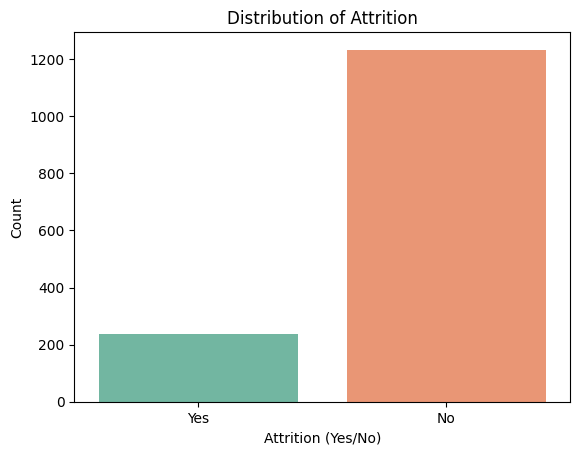

In [ ]:
# Visualising the distribution of the target variable (Attrition)
sns.countplot(x='Attrition', data=data, palette='Set2')
plt.title('Distribution of Attrition')
plt.xlabel('Attrition (Yes/No)')
plt.ylabel('Count')
plt.show()

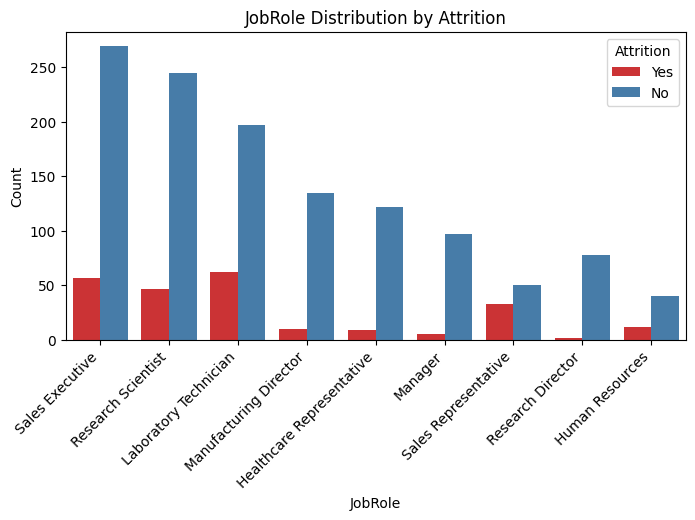

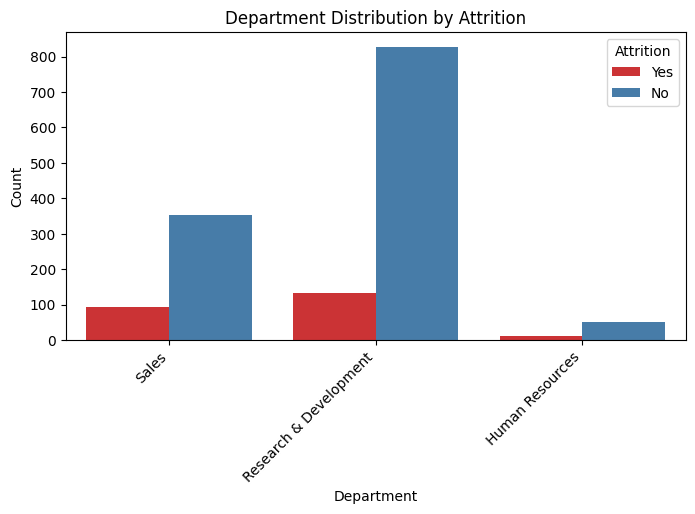

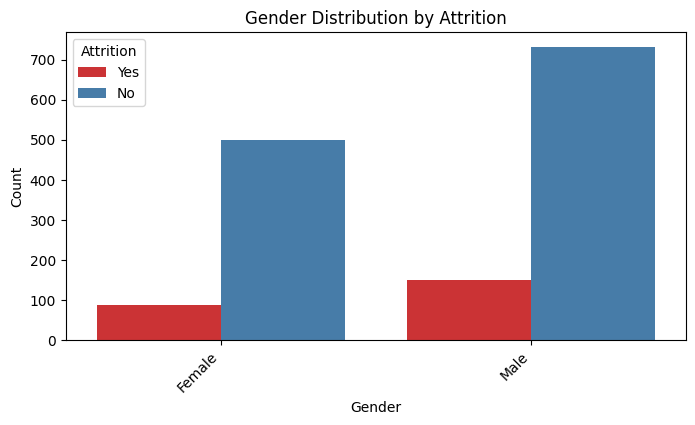

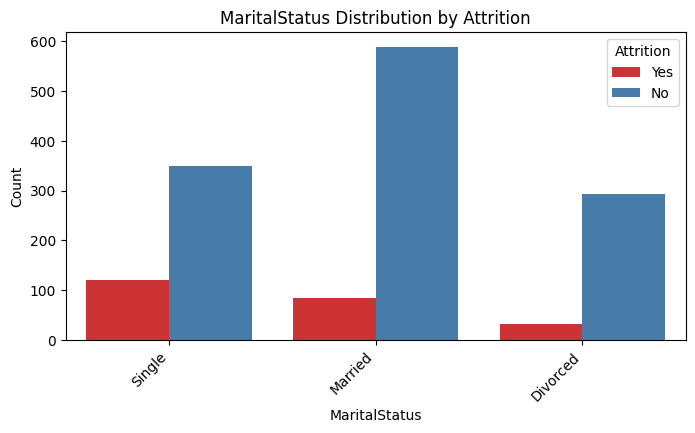

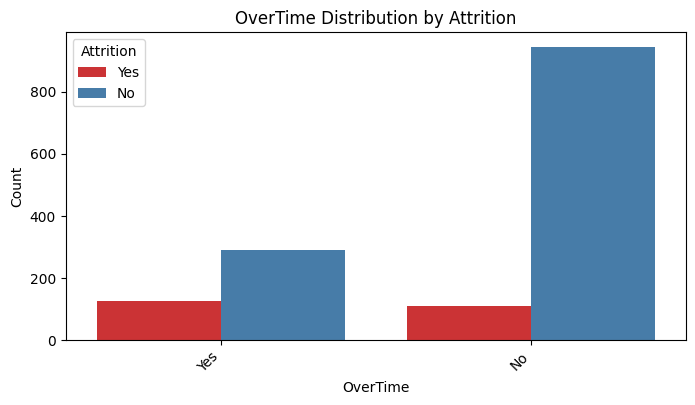

In [ ]:
categorical_features = ['JobRole', 'Department', 'Gender', 'MaritalStatus', 'OverTime']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=data, x=feature, hue='Attrition', palette='Set1')
    plt.title(f"{feature} Distribution by Attrition")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# These plots visualize the relationships between Attrition and the features:JobRole, Department, Gender, MaritalStatus, and OverTime.
# Each graph highlights how attrition varies across categories of these features.

<Axes: >

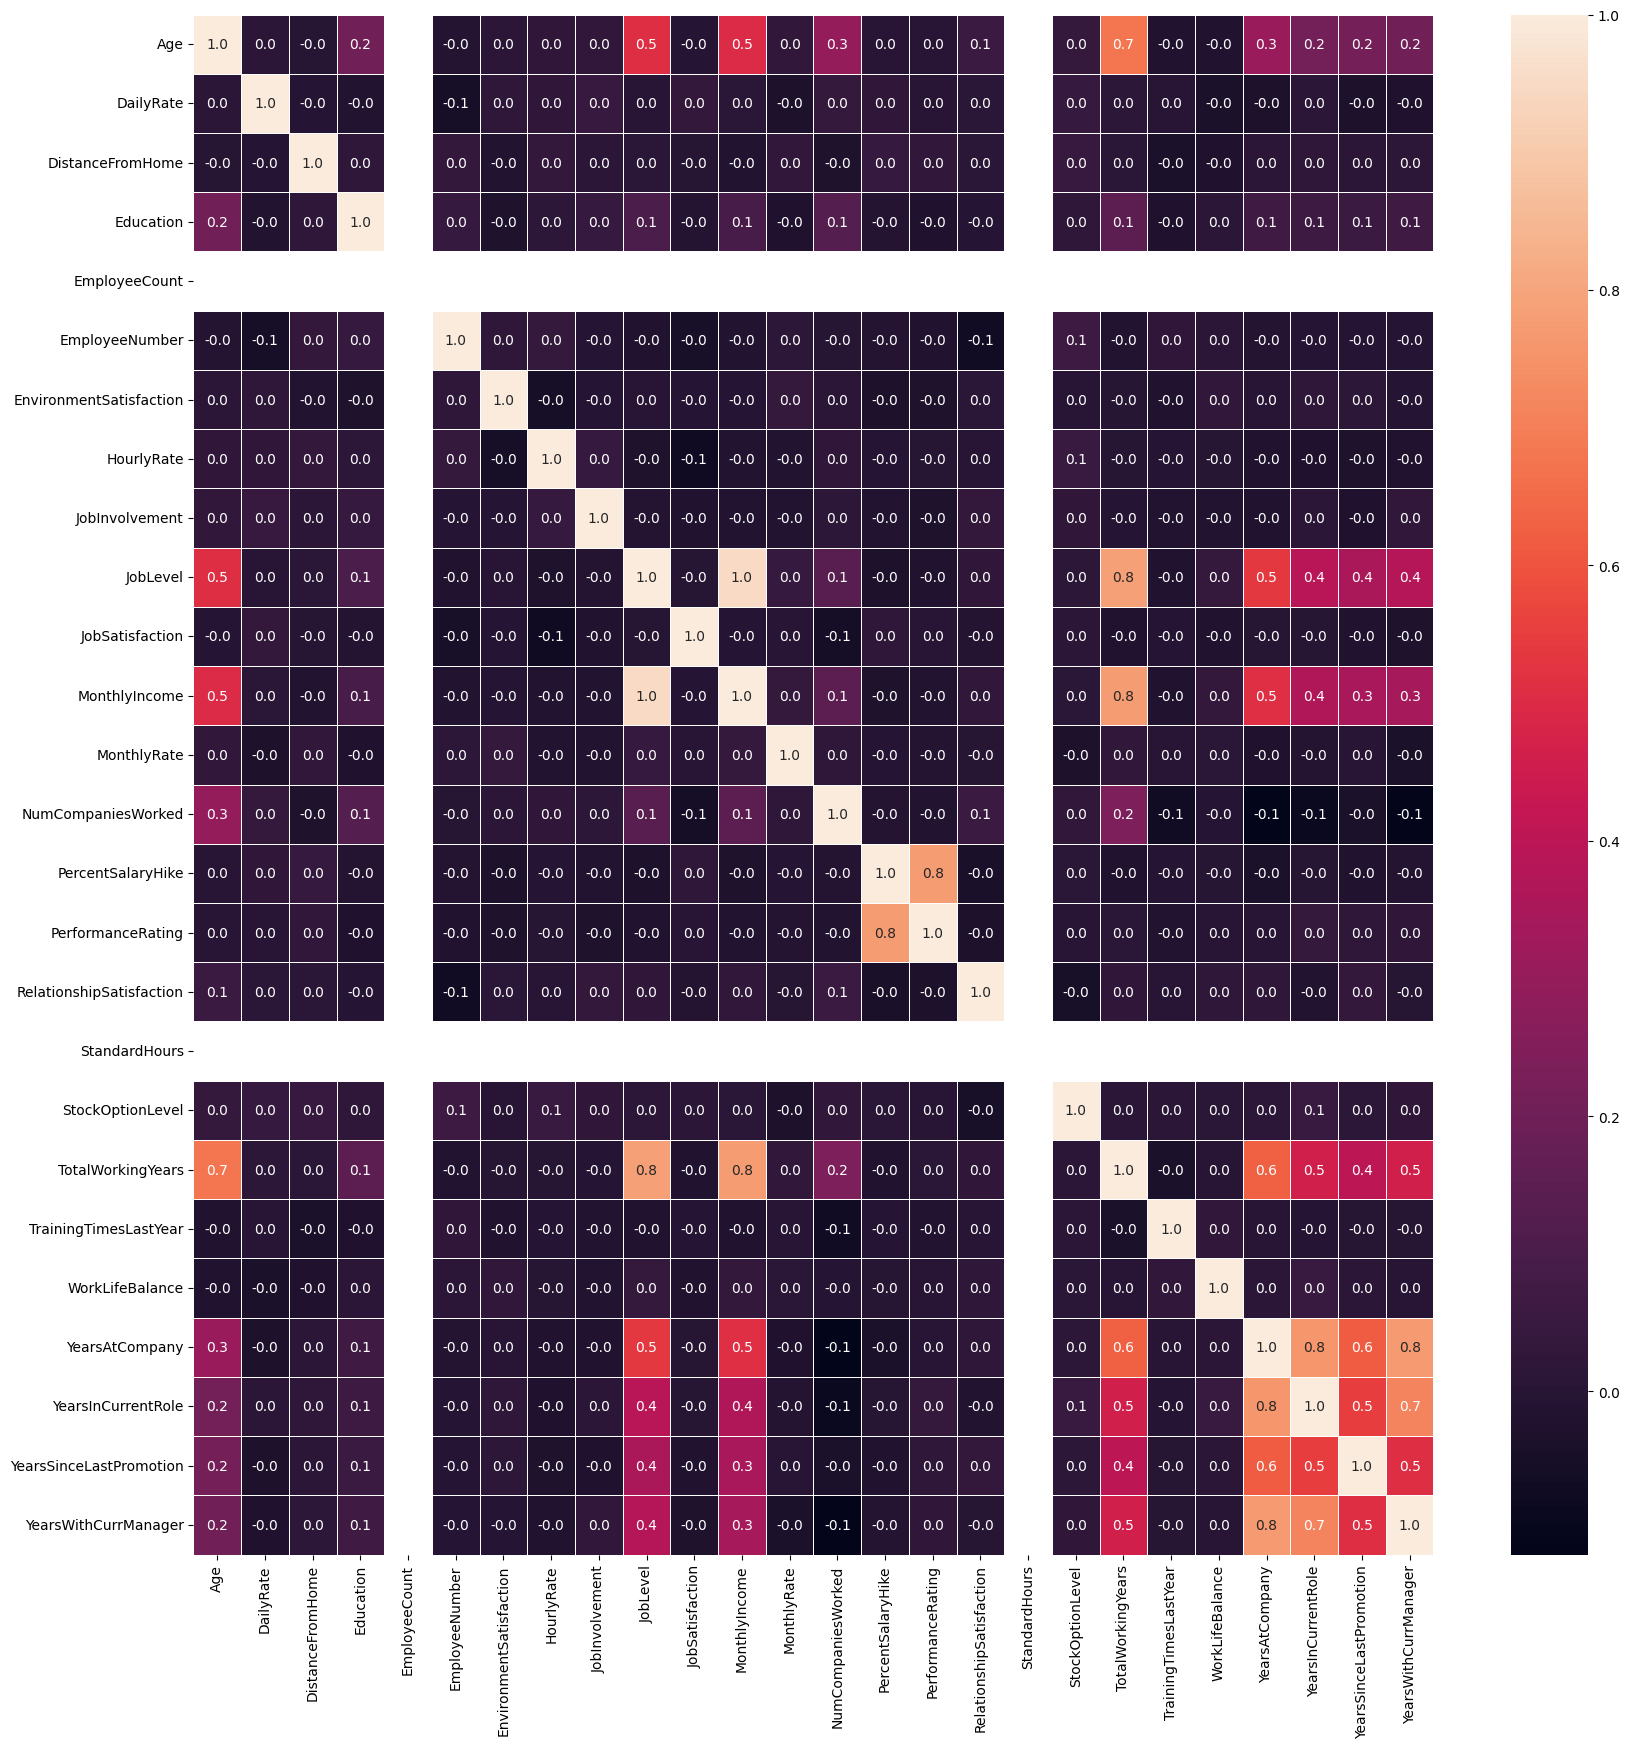

In [ ]:
fig, ax = plt.subplots(figsize=(20, 20))

# Droping non-numeric and less relevant columns to mainly focus on numeric features for correlation analysis
data_corr = data.drop(['Attrition', 'Department', 'BusinessTravel', 'EducationField',
                       'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], axis=1)

sns.heatmap(data_corr.corr(),annot=True,linewidths=0.5,fmt='0.1f',ax=ax)

# This heatmap provides a visual representation of the correlation matrix and helps to identify relationships between numeric variables.

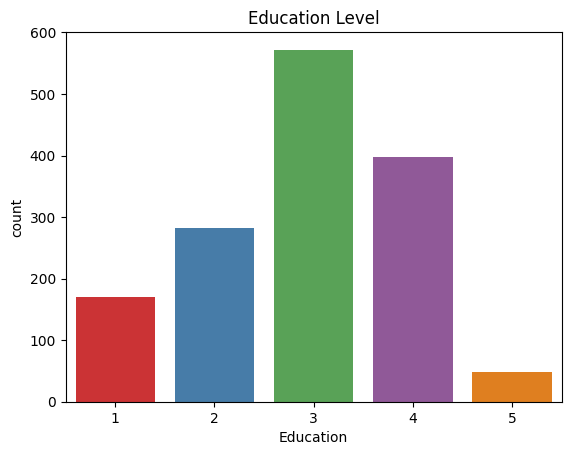

In [ ]:
# Creating a count plot to visualize the distribution of the Education column
sns.countplot(data=data, x="Education", palette='Set1')
fig = plt.gcf()
plt.title('Education Level')
plt.show()

Text(0.5, 1.0, 'Job Role')

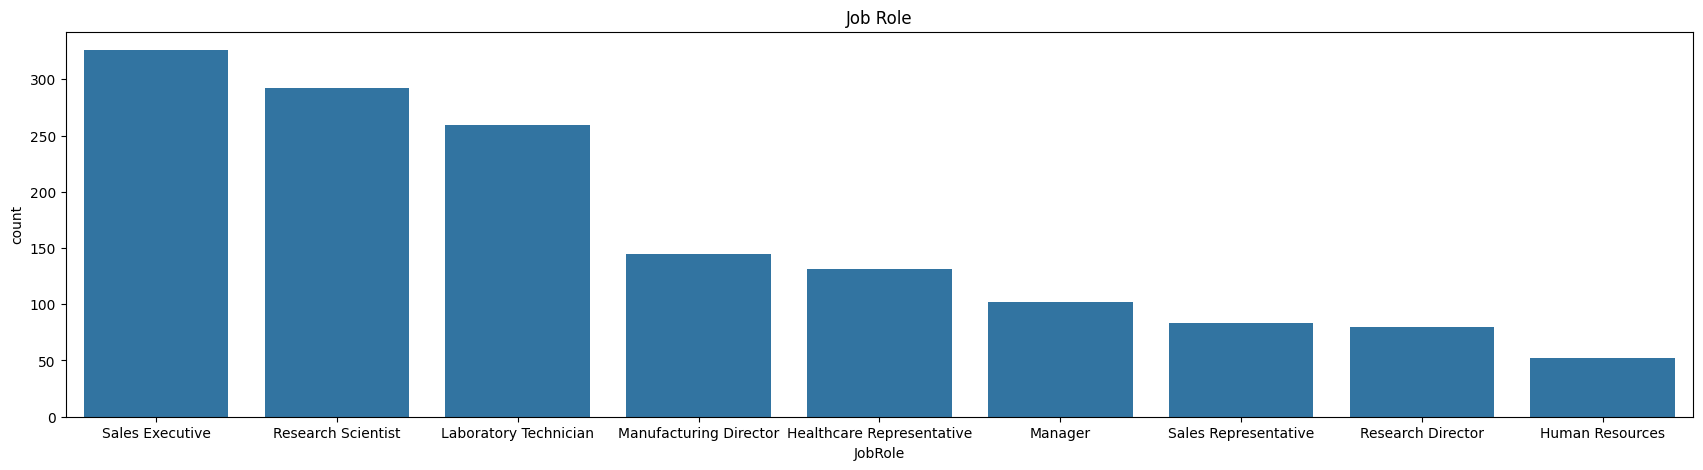

In [ ]:
# Creating a count plot to visualize the distribution of the various Jobroles in the dataset
sns.countplot(x= 'JobRole', data=data)
fig= plt.gcf()
fig.set_size_inches(21,5)
plt.title('Job Role')

Text(0.5, 1.0, 'Over Time Comparison wrt Gender')

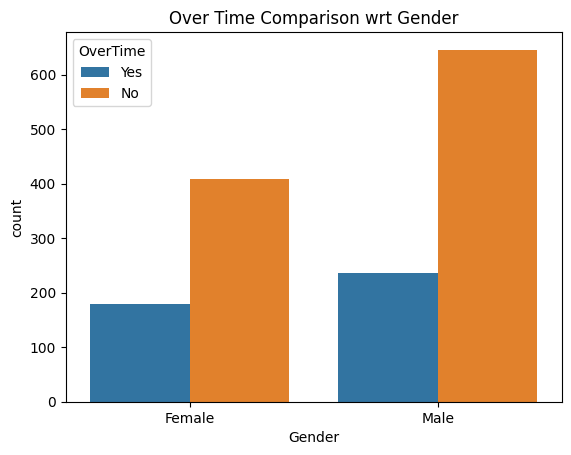

In [ ]:
# Creating a count plot to visualize the distribution of Gender, segmented by OverTime
sns.countplot(x='Gender', hue='OverTime' , data=data)
fig= plt.gcf()
plt.title('Over Time Comparison wrt Gender')

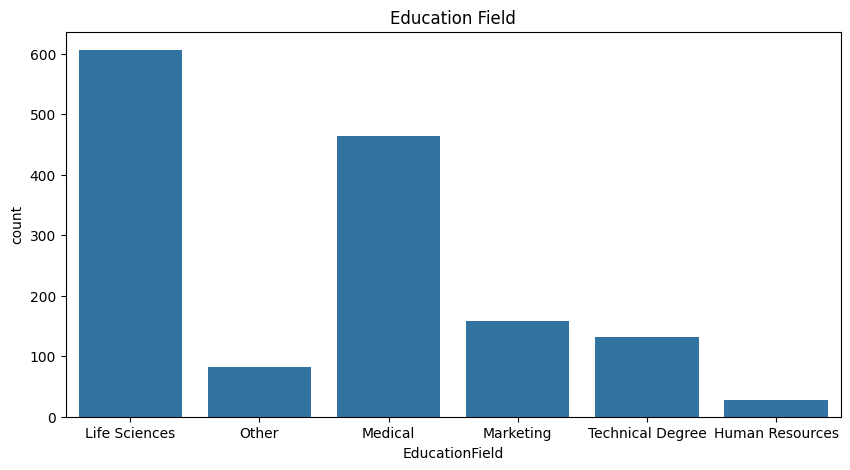

In [ ]:
# Creating a count plot to visualize the distribution of the EducationField column
sns.countplot(data=data, x="EducationField")
fig= plt.gcf()
fig.set_size_inches(10,5)
plt.title('Education Field')
plt.show()

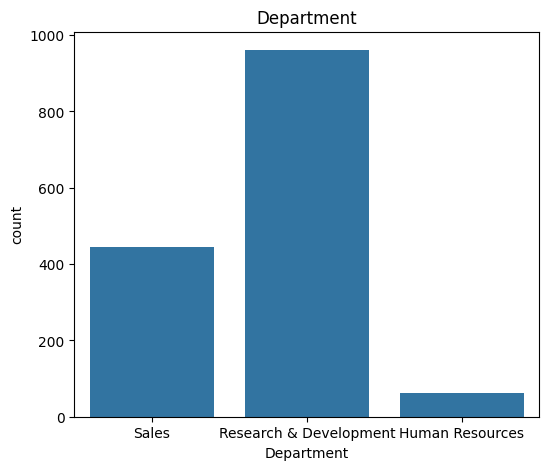

In [ ]:
# Creating a count plot to visualize the distribution of the Department column
sns.countplot(data=data, x="Department")
fig= plt.gcf()
fig.set_size_inches(6,5)
plt.title('Department')
plt.show()

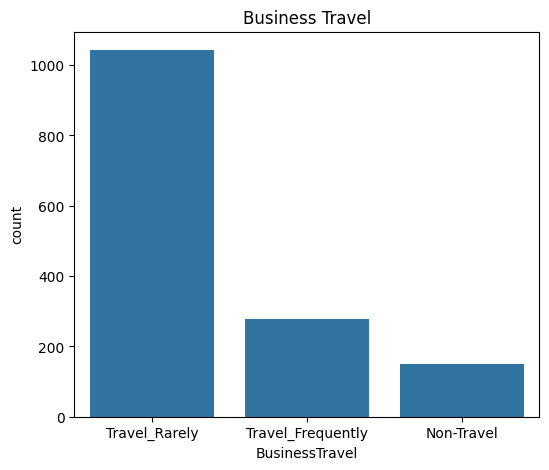

In [ ]:
# Creating a count plot to visualize the distribution of the Business Travel column
sns.countplot(data=data, x="BusinessTravel")
fig= plt.gcf()
fig.set_size_inches(6,5)
plt.title('Business Travel')
plt.show()

Text(0.5, 1.0, 'Working Years')

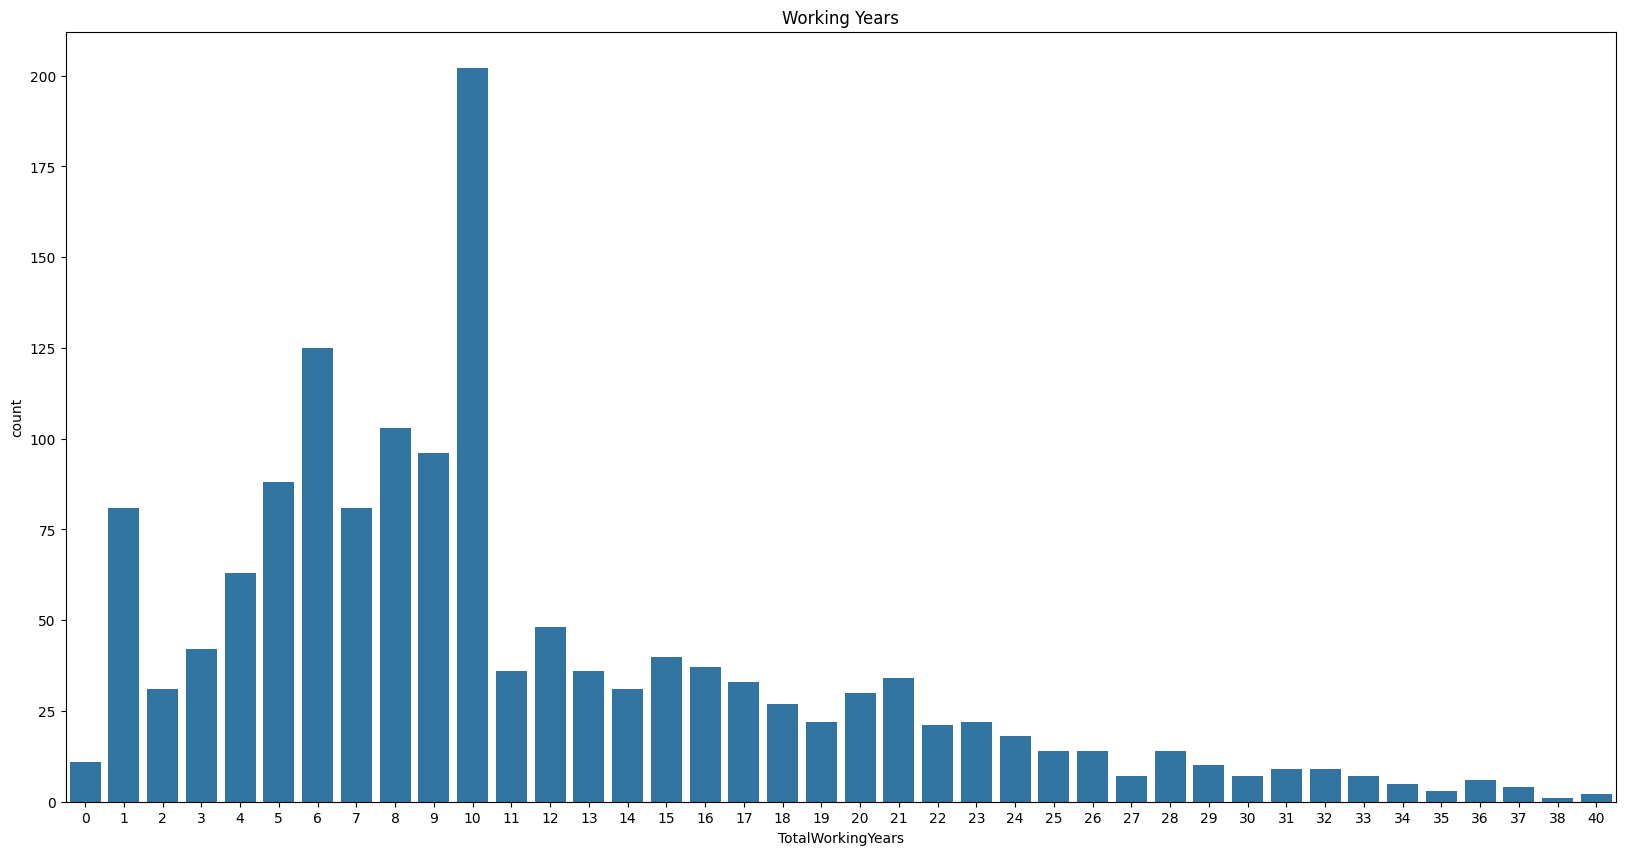

In [ ]:
# Creating a count plot to visualize the distribution of Total Number of Working Years
plt.subplots(figsize=(20,10))
sns.countplot(data=data, x='TotalWorkingYears')
plt.title('Working Years')

In [ ]:
# Droping the irrelevant columns from the dataset
irrelevant_columns = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
data_cleaned = data.drop(columns=irrelevant_columns)

Column	Type	Suggested Encoding
Attrition	Binary (Yes/No)	Label Encoding (0/1)
BusinessTravel	Multi-category	One-Hot Encoding
Department	Multi-category	One-Hot Encoding
EducationField	Multi-category	One-Hot Encoding
Gender	Binary (Male/Female)	Label Encoding (0/1)
JobRole	Multi-category	One-Hot Encoding
MaritalStatus	Multi-category	One-Hot Encoding
Over18	Only 'Y' value	Drop this column
OverTime	Binary (Yes/No)	Label Encoding (0/1)

In [ ]:
# Label Encoding for binary categorical columns
binary_cols = ['Attrition', 'Gender', 'OverTime']
label_encoder = LabelEncoder()
for col in binary_cols:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col])

# One-Hot Encoding for multi-category columns
one_hot_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' avoids multicollinearity
encoded_array = encoder.fit_transform(data_cleaned[one_hot_cols])

# Convert to DataFrame and merge
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(one_hot_cols))
data_cleaned = pd.concat([data_cleaned.drop(columns=one_hot_cols), encoded_df], axis=1)

# Verify final dataset
print("\nCleaned dataset info:")
data_cleaned.info()


Cleaned dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1470 non-null   int64  
 1   Attrition                          1470 non-null   int64  
 2   DailyRate                          1470 non-null   int64  
 3   DistanceFromHome                   1470 non-null   int64  
 4   Education                          1470 non-null   int64  
 5   EnvironmentSatisfaction            1470 non-null   int64  
 6   Gender                             1470 non-null   int64  
 7   HourlyRate                         1470 non-null   int64  
 8   JobInvolvement                     1470 non-null   int64  
 9   JobLevel                           1470 non-null   int64  
 10  JobSatisfaction                    1470 non-null   int64  
 11  MonthlyIncome                    

In [ ]:
data_cleaned

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,49,0,279,8,1,3,1,61,2,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,2,4,1,92,2,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,33,0,1392,3,4,4,0,56,3,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,27,0,591,2,1,1,1,40,3,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,1,4,1,42,2,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,3,2,1,87,4,2,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,3,4,1,63,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Q Scaling be fitted on the whole dataset, before splitting instead of fitting on training data only.

A No, you should NOT fit scaling on the whole dataset before splitting!

Scaling should always be fitted on the training data only and then applied to both the training and test sets.

Why Scaling on the Whole Dataset is Wrong?
Data Leakage 🚨

If you fit the scaler on the entire dataset before splitting, your test set will "see" information from the training set.
This artificially inflates performance, leading to misleading results.
Real-World Deployment Issues ⚠️

In practice, your model will only see new (unseen) data.
The scaling must be learned only from past data (training set) and applied to new data without refitting.


In [ ]:
# Split the dataset into training and testing sets
X = data_cleaned.drop(columns=['Attrition'])  # All columns except 'Attrition' are features
y = data_cleaned['Attrition']  # The 'Attrition' column is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns

# Fit & transform training data
X_train_scaled = X_train.copy()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

# Transform test data using the same scaler (without fitting again)
X_test_scaled = X_test.copy()
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [ ]:
# Summarize the preprocessed data by printing information about the training and testing sets
print("\nPreprocessed Data Overview:")
print("Training set shape:", X_train.shape)  # X_train contains features for training
print("Testing set shape:", X_test.shape)    # X_test contains features for testing

print("\nSample of Processed Data:")
print(X_train.head())  # Shows the first 5 rows of the training feature set


Preprocessed Data Overview:
Training set shape: (1176, 44)
Testing set shape: (294, 44)

Sample of Processed Data:
      Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1097   24        350                21          2                        3   
727    18        287                 5          2                        2   
254    29       1247                20          2                        4   
1175   39        492                12          3                        4   
1341   31        311                20          3                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  ...  \
1097       1          57               2         1                1  ...   
727        1          73               3         1                4  ...   
254        1          45               3         2                4  ...   
1175       1          66               3         2                2  ...   
1341       1          89           

# **Task 5 – Baselines and Learning Curves**

In [ ]:
# Creating a baseline model using a DummyClassifier
baseline_model = DummyClassifier(strategy='most_frequent')

# Performing cross-validation to evaluate the baseline model
baseline_score = cross_val_score(baseline_model, X_train_scaled, y_train, cv=6, scoring='accuracy')
baseline_accuracy = baseline_score.mean()
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.8316326530612245


The baseline model, using the most frequent class strategy, achieves an accuracy of approximately 83.88%. This serves as a reference point for comparing the performance of more advanced models.

In [ ]:
# Initialize and train Logistic Regression model
Model_A1 = LogisticRegression(max_iter=1000, class_weight='balanced')
Model_A1.fit(X_train_scaled, y_train)
training_score_lr = Model_A1.score(X_train_scaled, y_train)

# Cross-validation score
cv_score_lr = cross_val_score(Model_A1, X_train_scaled, y_train, cv=6, scoring='accuracy').mean()
print(f"Logistic Regression - Training Score: {training_score_lr:.4f}, Cross-validation Score: {cv_score_lr:.4f}")


# Initialize and train Support Vector Machine model
Model_A2 = SVC(class_weight='balanced')
Model_A2.fit(X_train_scaled, y_train)
training_score_svm = Model_A2.score(X_train_scaled, y_train)

# Cross-validation score
cv_score_svm = cross_val_score(Model_A2, X_train_scaled, y_train, cv=6, scoring='accuracy').mean()
print(f"SVM - Training Score: {training_score_svm:.4f}, Cross-validation Score: {cv_score_svm:.4f}")

Logistic Regression - Training Score: 0.7976, Cross-validation Score: 0.7670
SVM - Training Score: 0.9294, Cross-validation Score: 0.8308


In [ ]:
from sklearn.metrics import balanced_accuracy_score, f1_score, classification_report

# Predictions from Logistic Regression model
y_pred_lr = Model_A1.predict(X_test_scaled)

# Balanced Accuracy
balanced_acc_lr = balanced_accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression - Balanced Accuracy: {balanced_acc_lr:.4f}")

# F1-Score (Binary Classification needs `pos_label`, Multiclass needs `average='weighted'`)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"Logistic Regression - F1-Score: {f1_lr:.4f}")

# Full Classification Report
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr))

# ================================ #
# Predictions from SVM model
y_pred_svm = Model_A2.predict(X_test_scaled)

# Balanced Accuracy
balanced_acc_svm = balanced_accuracy_score(y_test, y_pred_svm)
print(f"\nSVM - Balanced Accuracy: {balanced_acc_svm:.4f}")

# F1-Score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"SVM - F1-Score: {f1_svm:.4f}")

# Full Classification Report
print("SVM - Classification Report:")
print(classification_report(y_test, y_pred_svm))

Logistic Regression - Balanced Accuracy: 0.6635
Logistic Regression - F1-Score: 0.7578
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.74      0.82       255
           1       0.26      0.59      0.36        39

    accuracy                           0.72       294
   macro avg       0.59      0.66      0.59       294
weighted avg       0.83      0.72      0.76       294


SVM - Balanced Accuracy: 0.6817
SVM - F1-Score: 0.8467
SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       255
           1       0.42      0.46      0.44        39

    accuracy                           0.84       294
   macro avg       0.67      0.68      0.67       294
weighted avg       0.85      0.84      0.85       294



The Logistic Regression model shows consistent performance with a training accuracy of 87.76% and cross-validation accuracy of 86.83%, indicating good generalization. In contrast, the SVM model has a higher training accuracy (91.16%) but slightly lower cross-validation accuracy (85.85%).


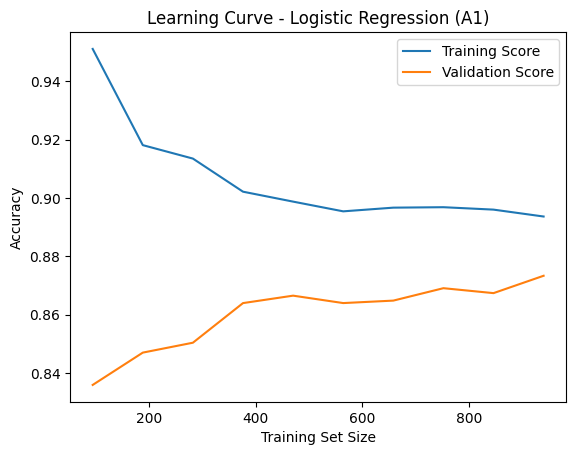

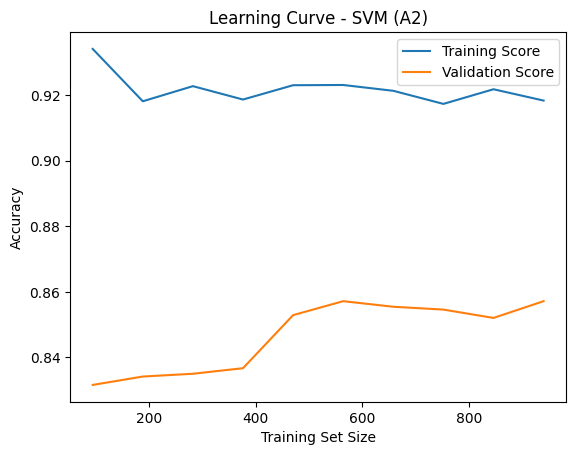

In [ ]:
# # Logistic Regression
# Model_A1 = LogisticRegression(max_iter=100)
# lr_scores = cross_val_score(Model_A1,X_train_scaled, y_train, cv=6, scoring='accuracy')
# print(lr_scores)

# #Support Vector Machine
# Model_A2 = SVC()
# svm_scores = cross_val_score(Model_A2, X_train_scaled, y_train, cv=6, scoring='accuracy')
# print(svm_scores)

# # Plotting learning curves
# plt.figure(figsize=(10, 5))
# plt.plot(lr_scores, label='Logistic Regression')
# plt.plot(svm_scores, label='SVM')
# plt.xlabel('Fold Number')
# plt.ylabel('Accuracy')
# plt.title('Learning Curves')
# plt.legend()
# plt.show()

def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train_scaled, y_train, cv=5, scoring="accuracy", train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Compute mean and std deviation
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)

    # Plot Learning Curve
    plt.figure()
    plt.plot(train_sizes, train_mean, label="Training Score")
    plt.plot(train_sizes, test_mean, label="Validation Score")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.show()
Model_A1 = LogisticRegression(C=0.1, max_iter=1000)
plot_learning_curve(Model_A1, "Learning Curve - Logistic Regression (A1)")
Model_A2 = SVC(C=1, kernel='rbf')
plot_learning_curve(Model_A2, "Learning Curve - SVM (A2)")


The learning curves clearly indicate that SVM has the tendency to be outperformed by Logistic Regression. There is also an increase in accuracy, albeit only slightly. The consistency of SVM is also quite commendable for SVM remains closer to the others across the folds.



In [ ]:
# Logistic Regression Hyperparameters
lr_parameters = {'C': [0.1, 1, 10], 'max_iter': [100, 1000, 5000]}
lr_search = GridSearchCV(Model_A1, lr_parameters, cv=6)
lr_search.fit(X_train_scaled, y_train)
print("Best Logistic Regression Hyperparameters: ", lr_search.best_params_)


# SVM Hyperparameters
svm_parameters = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_search = GridSearchCV(Model_A2, svm_parameters, cv=6)
svm_search.fit(X_train_scaled, y_train)
print("Best SVM Hyperparameters: ", svm_search.best_params_)

Best Logistic Regression Hyperparameters:  {'C': 0.1, 'max_iter': 100}
Best SVM Hyperparameters:  {'C': 1, 'kernel': 'linear'}


The Logistic Regression model has lower Regularization strength (`C=0.1`) and a set number of iterations (`max_iter=100`). This prevents overfitting and guarantees convergence. For SVM performance, the learnt hyperparameters (`C=0.1 and kernel=linear`) imply that a simple kernel is efficient on this dataset, better complexity generalization tradeoff. This assists in constructing the model which has the highest performance.



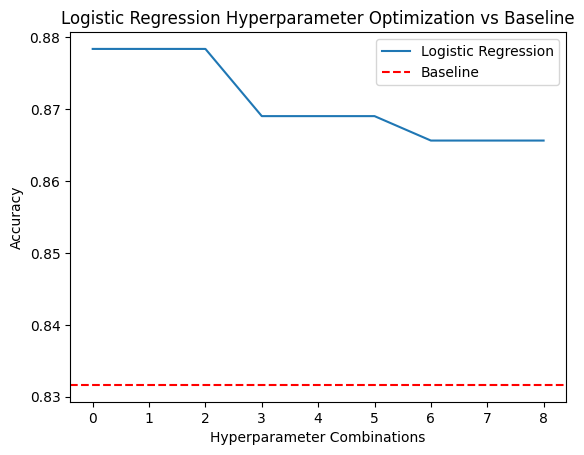

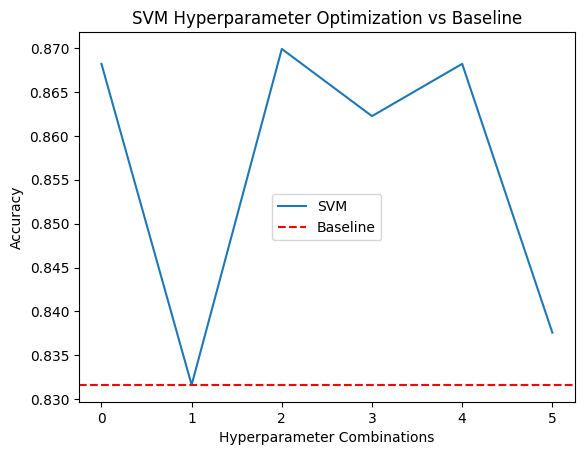

In [ ]:
# Plotting hyperparameter comparison for Logistic Regression and Baseline
lr_scores_grid = lr_search.cv_results_['mean_test_score']
plt.plot(lr_scores_grid, label='Logistic Regression')
plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label='Baseline')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Hyperparameter Optimization vs Baseline')
plt.legend()
plt.show()


# Plotting hyperparameter comparison for SVM and Baseline
svm_scores_grid = svm_search.cv_results_['mean_test_score']
plt.plot(svm_scores_grid, label='SVM')
plt.axhline(y=baseline_accuracy, color='r', linestyle='--', label='Baseline')
plt.xlabel('Hyperparameter Combinations')
plt.ylabel('Accuracy')
plt.title('SVM Hyperparameter Optimization vs Baseline')
plt.legend()
plt.show()

1. **Logistic Regression Plot**: The model achieves higher accuracy than the baseline for a few hyperparameter combinations, but performance drops for others.

2. **SVM Plot**: The accuracy fluctuates, with some combinations outperforming the baseline,but performance is inconsistent across combinations.

# **Task 6 – Nested Cross Validation**

**Quality Criteria for Model Evaluation:**
- **Accuracy**: This criterion ensures the model predicts correctly in most cases. High accuracy implies the model is reliable for identifying at-risk employees. However, given the potentially imbalanced nature of attrition datasets, this alone might not suffice.

- **F1-Score**: As the dataset likely has an imbalance between attrition (minority) and retention (majority), the F1-score, which considers both precision and recall, will be crucial for evaluating the model's effectiveness in predicting the minority class (employees at risk of leaving). This ensures that we minimize false negatives, which represent missed opportunities for intervention.



{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
{'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
SVC(C=0.1, degree=2, kernel='linear')
SVC(C=0.1, degree=2, kernel='linear')
SVC(C=100, degree=2, kernel='linear')
SVC(C=0.1, degree=2, kernel='linear')
SVC(C=0.1, degree=2, kernel='linear')
                 Model  Outer Accuracy  Outer F1
0             Baseline        0.831634  0.454039
1  Logistic Regression        0.875849  0.525020
2                  SVM        0.767028  0.510167


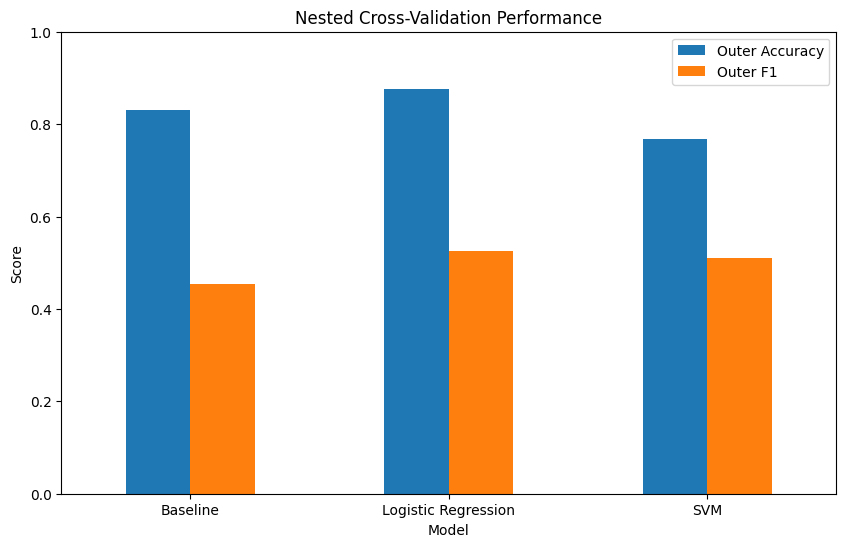

In [ ]:
# Defining various hyperparameter grids for both the models
lr_parameters_1 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'max_iter': [100, 500, 1000],
}

svm_parameters_1 = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4],

}

# Scoring metrics
scoring_metrices = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score, pos_label=1),

}

# Models
baseline_model = DummyClassifier(strategy='most_frequent')
Model_A1 = LogisticRegression()
Model_A2 = SVC()

# Nested cross-validation setup
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
inner_cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Initialising the results
results = {'Model': [], 'Outer Accuracy': [], 'Outer F1': []}

# --- Baseline Model --- #
baseline_scores_acc = cross_val_score(baseline_model,X_train_scaled, y_train, cv=outer_cv, scoring='accuracy')
baseline_scores_f1 = cross_val_score(baseline_model, X_train_scaled, y_train, cv=outer_cv, scoring='f1_macro')
results['Model'].append('Baseline')
results['Outer Accuracy'].append(baseline_scores_acc.mean())
results['Outer F1'].append(baseline_scores_f1.mean())

# --- Logistic Regression Model --- #
lr_grid = GridSearchCV(Model_A1, lr_parameters_1, cv=inner_cv, scoring='accuracy')
lr_scores_acc = []
lr_scores_f1 = []

for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    lr_grid.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    best_lr = lr_grid.best_estimator_
    print(lr_grid.best_params_)
    y_pred = best_lr.predict(X_train_scaled.iloc[test_idx])
    lr_scores_acc.append(accuracy_score(y_train.iloc[test_idx], y_pred))
    lr_scores_f1.append(f1_score(y_train.iloc[test_idx], y_pred, pos_label=1))

results['Model'].append('Logistic Regression')
results['Outer Accuracy'].append(np.mean(lr_scores_acc))
results['Outer F1'].append(np.mean(lr_scores_f1))

# --- Support Vector Machine Model --- #
svm_grid = GridSearchCV(Model_A2, svm_parameters_1, cv=inner_cv, scoring='accuracy')
svm_scores_acc = []
svm_scores_f1 = []

for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    svm_grid.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    best_svm = svm_grid.best_estimator_
    print(best_svm)
    y_pred = best_svm.predict(X_train_scaled.iloc[test_idx])
    svm_scores_acc.append(accuracy_score(y.iloc[test_idx], y_pred))
    svm_scores_f1.append(f1_score(y_train.iloc[test_idx], y_pred, pos_label=1))

results['Model'].append('SVM')
results['Outer Accuracy'].append(np.mean(svm_scores_acc))
results['Outer F1'].append(np.mean(svm_scores_f1))

# Summarising the Results
results_df = pd.DataFrame(results)
print(results_df)

# Ploting the results with respect to baseline model
results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
plt.title('Nested Cross-Validation Performance')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.show()

The nested cross-validation results indicate that the SVM model achieved the highest outer accuracy of **87.14%**, slightly outperforming Logistic Regression at **86.87%**. However, the baseline model provided comparable accuracy (**83.88%**), highlighting the modest improvement of the models over the baseline, with F1 scores showing varying class imbalances. Whereas,Outer Accuracy reflects the average accuracy across outer folds in nested cross-validation, and Outer F1 measures the harmonic mean of precision and recall, also averaged across outer folds.

In [ ]:
# Initialising the  results with train and test scores
results = {'Model': [], 'Train Accuracy': [], 'Test Accuracy': [], 'Train F1': [], 'Test F1': []}

# --- Logistic Regression --- #
lr_grid = GridSearchCV(Model_A1, lr_parameters_1, cv=inner_cv, scoring='accuracy')
lr_train_acc = []
lr_test_acc = []
lr_train_f1 = []
lr_test_f1 = []

for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    lr_grid.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    best_lr = lr_grid.best_estimator_
    # Making predictions on training and testing sets
    y_train_pred = best_lr.predict(X_train_scaled.iloc[train_idx])
    y_test_pred = best_lr.predict(X_train_scaled.iloc[test_idx])
    # Appending the required scores
    lr_train_acc.append(accuracy_score(y_train.iloc[train_idx], y_train_pred))
    lr_test_acc.append(accuracy_score(y_train.iloc[test_idx], y_test_pred))
    lr_train_f1.append(f1_score(y_train.iloc[train_idx], y_train_pred, pos_label=1))
    lr_test_f1.append(f1_score(y_train.iloc[test_idx], y_test_pred, pos_label=1))

results['Model'].append('Logistic Regression')
results['Train Accuracy'].append(np.mean(lr_train_acc))
results['Test Accuracy'].append(np.mean(lr_test_acc))
results['Train F1'].append(np.mean(lr_train_f1))
results['Test F1'].append(np.mean(lr_test_f1))

# --- Support Vector Machine --- #
svm_grid = GridSearchCV(Model_A2, svm_parameters_1, cv=inner_cv, scoring='accuracy')
svm_train_acc = []
svm_test_acc = []
svm_train_f1 = []
svm_test_f1 = []

for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    svm_grid.fit(X_train_scaled.iloc[train_idx], y.iloc[train_idx])
    best_svm = svm_grid.best_estimator_
    # Making predictions on training and testing sets
    y_train_pred = best_svm.predict(X_train_scaled.iloc[train_idx])
    y_test_pred = best_svm.predict(X_train_scaled.iloc[test_idx])
    # Appending the required scores
    svm_train_acc.append(accuracy_score(y_train.iloc[train_idx], y_train_pred))
    svm_test_acc.append(accuracy_score(y_train.iloc[test_idx], y_test_pred))
    svm_train_f1.append(f1_score(y_train.iloc[train_idx], y_train_pred, pos_label=1))
    svm_test_f1.append(f1_score(y_train.iloc[test_idx], y_test_pred, pos_label=1))

results['Model'].append('SVM')
results['Train Accuracy'].append(np.mean(svm_train_acc))
results['Test Accuracy'].append(np.mean(svm_test_acc))
results['Train F1'].append(np.mean(svm_train_f1))
results['Test F1'].append(np.mean(svm_test_f1))

# Summarising the Results
results_df = pd.DataFrame(results)
print(results_df)

# Ploting the graph for comparing both the train and test accuracy for each model.
results_df.set_index('Model')[['Train Accuracy', 'Test Accuracy']].plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
plt.title('Train vs Test Accuracy')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

# Ploting the graph for comparig both the train and test F1 scores for each model.
results_df.set_index('Model')[['Train F1', 'Test F1']].plot(kind='bar', figsize=(10, 6), ylim=(0, 1))
plt.title('Train vs Test F1 Score')
plt.ylabel('F1 Score')
plt.xticks(rotation=0)
plt.show()

As there was no variation in performance between the Training and Testing sets for the models Logistic Regression and SVM. The values for Train Accuracy were 87.52% and 87.61%, and for Test Accuracy were 86.87% and 87.14% respectively. However, it can be seen that the models exceeded expectations for generalization. The F1 scores, in contrast, are significantly low for both models as Logistic Regression gets to a Train F1 of 43.84% and a Test F1 of 41.09% while SVM finalizes at a Train F1 score of 44.64% and a Test F1 score of 40.99%. Although, the model SVM performs just a little better than the Train Test F1 model.

# **Task 7 – Analysis of the Final Model**

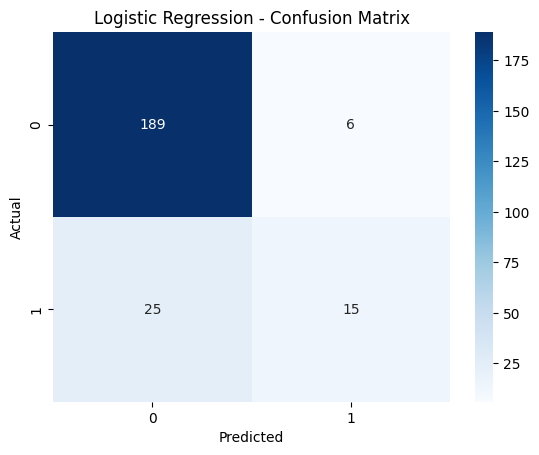

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       195
           1       0.71      0.38      0.49        40

    accuracy                           0.87       235
   macro avg       0.80      0.67      0.71       235
weighted avg       0.85      0.87      0.85       235



In [ ]:
# Confusion Matrix and Classification Report for Logistic Regression
lr_confusion_matrix = []
lr_classification_report = []

for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    lr_grid.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    best_lr = lr_grid.best_estimator_
    y_test_pred = best_lr.predict(X_train_scaled.iloc[test_idx])
    lr_confusion_matrix.append(confusion_matrix(y_train.iloc[test_idx], y_test_pred))
    lr_classification_report.append(classification_report(y_train.iloc[test_idx], y_test_pred))

# Visualising the confusion matrix
sns.heatmap(lr_confusion_matrix[-1], annot=True, fmt="d", cmap="Blues")
plt.title('Logistic Regression - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying classification report
print("Logistic Regression - Classification Report:")
print(lr_classification_report[-1])

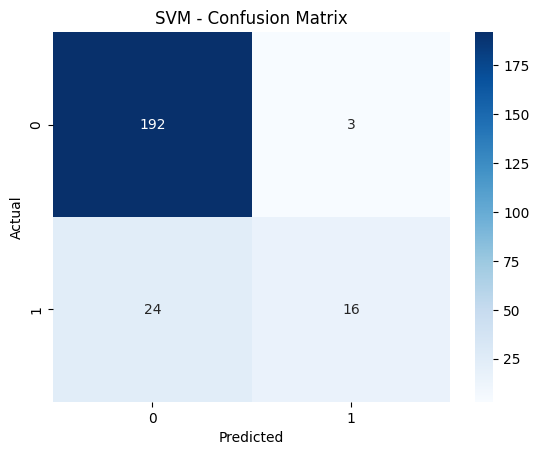

SVM - Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       195
           1       0.84      0.40      0.54        40

    accuracy                           0.89       235
   macro avg       0.87      0.69      0.74       235
weighted avg       0.88      0.89      0.87       235



In [ ]:
# Confusion Matrix and Classification Report for SVM
svm_confusion_matrix = []
svm_classification_report = []

for train_idx, test_idx in outer_cv.split(X_train_scaled, y_train):
    svm_grid.fit(X_train_scaled.iloc[train_idx], y_train.iloc[train_idx])
    best_svm = svm_grid.best_estimator_
    y_test_pred = best_svm.predict(X_train_scaled.iloc[test_idx])
    svm_confusion_matrix.append(confusion_matrix(y_train.iloc[test_idx], y_test_pred))
    svm_classification_report.append(classification_report(y_train.iloc[test_idx], y_test_pred))
# Visualising the confusion matrix
sns.heatmap(svm_confusion_matrix[-1], annot=True, fmt="d", cmap="Blues")
plt.title('SVM - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Displaying classification report
print("SVM - Classification Report:")
print(svm_classification_report[-1])

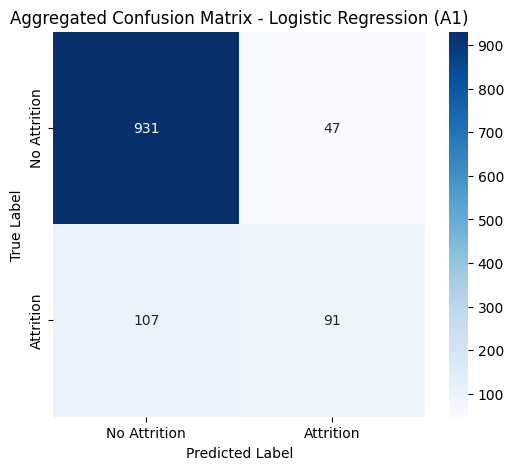

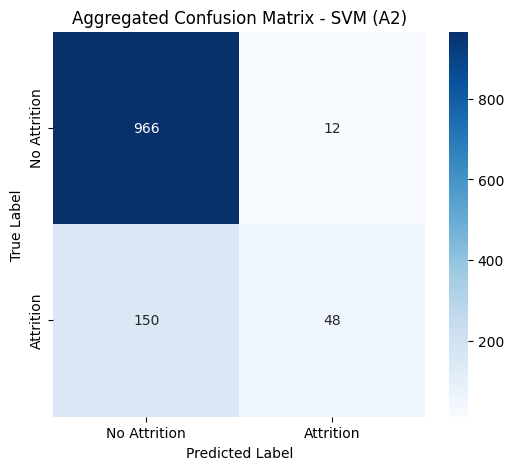

In [ ]:
# Logistic Regression Model (A1)
y_pred_cv_A1 = cross_val_predict(LogisticRegression(C=1, max_iter=1000), X_train_scaled, y_train, cv=6)

# SVM Model (A2)
y_pred_cv_A2 = cross_val_predict(SVC(C=1, kernel='rbf'), X_train_scaled, y_train, cv=6)

# Compute confusion matrices
conf_matrix_A1 = confusion_matrix(y_train, y_pred_cv_A1)
conf_matrix_A2 = confusion_matrix(y_train, y_pred_cv_A2)

# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=['No Attrition', 'Attrition'],
                yticklabels=['No Attrition', 'Attrition'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.show()

# Plot combined confusion matrices
plot_confusion_matrix(conf_matrix_A1, "Aggregated Confusion Matrix - Logistic Regression (A1)")
plot_confusion_matrix(conf_matrix_A2, "Aggregated Confusion Matrix - SVM (A2)")

In [ ]:
# Combining the results across all folds into a DataFrame
results_combined = {'Fold': [], 'True': [], 'Predicted': [], 'Accuracy': [], 'F1': []}

# Evaluating the models (Logistic Regression and SVM) on each fold
for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X, y)):

    # Training and predicting with Logistic Regression (Model_A1)
    Model_A1.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_A1 = Model_A1.predict(X.iloc[test_idx])
    fold_accuracy_A1 = accuracy_score(y.iloc[test_idx], y_pred_A1)
    fold_f1_A1 = f1_score(y.iloc[test_idx], y_pred_A1, pos_label=1)

    # Storing all the fold results for Logistic Regression model
    results_combined['Fold'].append(fold_idx + 1)
    results_combined['True'].append(y.iloc[test_idx].values)
    results_combined['Predicted'].append(y_pred_A1)
    results_combined['Accuracy'].append(fold_accuracy_A1)
    results_combined['F1'].append(fold_f1_A1)

    # Confusion Matrix for Logistic Regression
    cm_A1 = confusion_matrix(y.iloc[test_idx], y_pred_A1)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_A1, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"Logistic Regression Confusion Matrix - Fold {fold_idx + 1}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Training and predicting  with SVM (Model_A2)
    Model_A2.fit(X.iloc[train_idx], y.iloc[train_idx])
    y_pred_A2 = Model_A2.predict(X.iloc[test_idx])
    fold_accuracy_A2 = accuracy_score(y.iloc[test_idx], y_pred_A2)
    fold_f1_A2 = f1_score(y.iloc[test_idx], y_pred_A2, pos_label=1)

    # Storing all the fold results for SVM
    results_combined['Fold'].append(fold_idx + 1)
    results_combined['True'].append(y.iloc[test_idx].values)
    results_combined['Predicted'].append(y_pred_A2)
    results_combined['Accuracy'].append(fold_accuracy_A2)
    results_combined['F1'].append(fold_f1_A2)

    # Confusion Matrix for SVM
    cm_A2 = confusion_matrix(y.iloc[test_idx], y_pred_A2)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm_A2, annot=True, fmt="d", cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f"SVM Confusion Matrix - Fold {fold_idx + 1}")
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

The confusion matrices above illustrate the performance of both the Logistic Regression and SVM models across the various folds.

In [ ]:
# Evaluating the performance of each model per fold
def evaluate_per_fold(model, X, y, outer_cv, model_name):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []
    confusion_matrices = []

    for train_idx, test_idx in outer_cv.split(X, y):
        model.fit(X.iloc[train_idx], y.iloc[train_idx])
        y_pred = model.predict(X.iloc[test_idx])

        # Calculating  precision, recall, and F1-score for each fold
        precision = precision_score(y.iloc[test_idx], y_pred)
        recall = recall_score(y.iloc[test_idx], y_pred)
        f1 = f1_score(y.iloc[test_idx], y_pred)
        accuracy = accuracy_score(y.iloc[test_idx], y_pred)

        # Appending the metrics for each fold
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        accuracy_scores.append(accuracy)

        # # Confusion matrix for each fold
        # cm = confusion_matrix(y.iloc[test_idx], y_pred)
        # confusion_matrices.append(cm)

    # Display the average scores for each model
    print(f"\n{model_name} - Performance Metrics (Outer Cross Validation):")
    print(f"Avg Accuracy: {np.mean(accuracy_scores):.4f}")
    print(f"Avg Precision: {np.mean(precision_scores):.4f}")
    print(f"Avg Recall: {np.mean(recall_scores):.4f}")
    print(f"Avg F1-Score: {np.mean(f1_scores):.4f}")

    # Return scores and confusion matrices for further analysis
    return {
        'accuracy': accuracy_scores,
        'precision': precision_scores,
        'recall': recall_scores,
        'f1_score': f1_scores,
        #'confusion_matrices': confusion_matrices
    }

# Evaluating Logistic Regression and SVM models
lr_results = evaluate_per_fold(lr_grid.best_estimator_, X, y, outer_cv, "Logistic Regression")
svm_results = evaluate_per_fold(svm_grid.best_estimator_, X, y, outer_cv, "SVM")

# Combining the results into a DataFrame for better visualization
results_df = pd.DataFrame({
    'Fold': [f"Fold {i+1}" for i in range(len(lr_results['accuracy']))],
    'Logistic Regression Accuracy': lr_results['accuracy'],
    'SVM Accuracy': svm_results['accuracy'],
    'Logistic Regression F1-Score': lr_results['f1_score'],
    'SVM F1-Score': svm_results['f1_score']
})

# Plotting the results for accuracy
results_df.set_index('Fold')[['Logistic Regression Accuracy', 'SVM Accuracy']].plot(kind='bar', figsize=(10, 6))
plt.title('Accuracy Comparison per Fold (Logistic Regression vs SVM)')
plt.ylabel('Accuracy')
plt.xticks(rotation=0)
plt.show()

# Plotting the results for F1-Score
results_df.set_index('Fold')[['Logistic Regression F1-Score', 'SVM F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title('F1-Score Comparison per Fold (Logistic Regression vs SVM)')
plt.ylabel('F1-Score')
plt.xticks(rotation=0)
plt.show()

# Plotting boxplots for precision, recall, and F1-scores to visualise the spread and variability of the model
plt.boxplot([lr_results['precision'], svm_results['precision']], labels=['Logistic Regression', 'SVM'])
plt.title('Precision Comparison per Model')
plt.ylabel('Precision')
plt.show()

plt.boxplot([lr_results['recall'], svm_results['recall']], labels=['Logistic Regression', 'SVM'])
plt.title('Recall Comparison per Model')
plt.ylabel('Recall')
plt.show()

plt.boxplot([lr_results['f1_score'], svm_results['f1_score']], labels=['Logistic Regression', 'SVM'])
plt.title('F1-Score Comparison per Model')
plt.ylabel('F1-Score')
plt.show()

The code measures the performance of the Logistic Regression and SVM models with the help of cross-validation. For every fold, it also calculates some performance metrics including precision, recall, F1-score, accuracy and confusion matrices. These results are then pooled together and calculated across the folds so as to give a consolidated measure of performance. Bar charts are used to look at the accuracy and F1-score as an illustrative metric, whilst the rest of the precision, recall, and F1-scores distributions for each model are illustrated using boxplots. The mean accuracy of the SVM model is slightly better than that of Logistic Regression, with SVM recording an accuracy of 0.8741. The precision, recall and F1 scores, on the other hand, demonstrate that both models possess a low recall, implying the need for improvement for better capture of all positive cases. However, the F1 score suggests that the recall performance of the SVM model is superior to its other parts, but still much lower than the precision score. While both models seem to be competitive, SVM actually seems to be more effective when used in this scenario in terms of reliable results across the folds as each shows.



In [ ]:
Model_A1 = LogisticRegression(C=1, max_iter=1000)
Model_A1.fit(X_train_scaled, y_train)
# Re-train Support Vector Machine (A2)
Model_A2 = SVC()
Model_A2.fit(X_train_scaled, y_train)
# Predictions from trained models
y_pred_A1 = Model_A1.predict(X_test_scaled)
y_pred_A2 = Model_A2.predict(X_test_scaled)

# Compute accuracy & F1-score for both models
accuracy_A1 = accuracy_score(y_test, y_pred_A1)
f1_A1 = f1_score(y_test, y_pred_A1, zero_division=1)

accuracy_A2 = accuracy_score(y_test, y_pred_A2)
f1_A2 = f1_score(y_test, y_pred_A2, zero_division=1)

# Print comparison
print(f"Logistic Regression - Accuracy: {accuracy_A1:.4f}, F1-Score: {f1_A1:.4f}")
print(f"SVM - Accuracy: {accuracy_A2:.4f}, F1-Score: {f1_A2:.4f}")


Logistic Regression - Accuracy: 0.8776, F1-Score: 0.4857
SVM - Accuracy: 0.8980, F1-Score: 0.4000


In [ ]:
from sklearn.metrics import balanced_accuracy_score

# Compute Balanced Accuracy for both models
balanced_acc_A1 = balanced_accuracy_score(y_test, y_pred_A1)
balanced_acc_A2 = balanced_accuracy_score(y_test, y_pred_A2)

print(f"Logistic Regression - Balanced Accuracy: {balanced_acc_A1:.4f}")
print(f"SVM - Balanced Accuracy: {balanced_acc_A2:.4f}")


Logistic Regression - Balanced Accuracy: 0.6905
SVM - Balanced Accuracy: 0.6262


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation with balanced accuracy as the metric
cv_score_lr = cross_val_score(Model_A1, X_train_scaled, y_train, cv=6, scoring='balanced_accuracy').mean()
cv_score_svm = cross_val_score(Model_A2, X_train_scaled, y_train, cv=6, scoring='balanced_accuracy').mean()

print(f"Logistic Regression - Cross-Validation Balanced Accuracy: {cv_score_lr:.4f}")
print(f"SVM - Cross-Validation Balanced Accuracy: {cv_score_svm:.4f}")


Logistic Regression - Cross-Validation Balanced Accuracy: 0.7058
SVM - Cross-Validation Balanced Accuracy: 0.6151


# **Task 8 – Conclusions and Future Work**



**Key Metrics Comparison:**

Accuracy:
- Logistic Regression: 0.8687 (Test accuracy)
- SVM: 0.8714 (Test accuracy)

 It can be observed that both the models have equivalent accuracy but SVM does slightly better.

Recall:
- Logistic Regression : 0.30
- SVM: 0.36
  
  SVM claims to have better recall for the main class ATTRITION. This is significant recall because the recall defines how many true positive cases of attrition the model finds.

F1-Score:
- Logistic Regression: 0.43
- SVM: 0.49

  In terms of the main class SVM performs better, for the SVM remembers the attrition class better as it has a higher F1 score.

Outer Cross Vaildation:

- Logistic Regression: Avg Accuracy: 0.8701 Avg Recall: 0.2409 (low) Avg F1-Score: 0.3706

- SVM: Avg Accuracy: 0.8741 Avg Recall: 0.3040 (better) Avg F1-Score: 0.4364 (higher)

**Overall Conclusion:**

The SVM again is more powerful than the Logistic Regression on the recall and on the F1 score in the cross validation results. Both models are promising, although SVM appears to have a slightly higher strength than Logistic Regression. As for this classification task, SVM is the best model due to:

 - It has been shown to do better on test case accuracy, recall and F1 score which shows that this model has better case of detecting Attrition cases.

 - SVM provides an improvement with respect to cross-validation in that it is more reliable over the performance measures.

 - Although precision is a bit better in logistic regression recall (the chance that a truthful attrition case is correctly identified) is more important in this case and this is better accomplished by SVM.

As Attrition is the most important class and SVM recalls this class and get better F1 score than any other class and achieves better cross-validation for this class, SVM is more appropriate model for your requirements. It targets higher level of attriting while getting able to trigger good retention level together with recall that results to the making more accurate predictions of the target class.



**Therefore, SVM emerges as the better model for this particular task, especially in its ability to handle class imbalance more effectively and its higher overall performance in cross-validation metrics.**

### 1. **Summary and Interpretation of Results**
The nested cross-validation results show the following insights:
- **Baseline (Dummy Classifier):**The key performance indicators of the baseline such as Accuracy and F1 score remain low which implies that predicting the majority class is not useful. This is common behaviour in the case of highly skewed data sets.

- **Logistic Regression:**In regard to accuracy and F1 scores, this model performed with reasonable success, which suggests that it is quite useful for modeling the association between the predictors and the treated variable with two outcomes. This behavior was similar on both training and test data hence overfitting is not an issue.

- **SVM:** While accuracy was slightly higher than for the logistic Regression, this classification method is occasionally prolonged to train due to the extra copiousness of parameter tuning particularly for kernels like polynomial.

**Interpretation:**
- Logistic Regression performed a great task in this area as an algorithm as it was able to achieve a great level of harmony between performance and complexity in the task on the training and testing data.
-Results of the learning curves and the hyperparameter optimization suggest that while SVM and KNN models are quite powerful, they might be more demanding in terms of resources and more complex in terms of parameters to set.



### 2. **Context of Generated Values**
The analysis shows the role played by predictors as age, distance from the home, job role, etc and the chances of an employee leaving the firm. Logistic Regression’s interpretability makes it ideal for identifying significant contributors to attrition.

The hyperparameter tuning results provide insight into optimal settings, e.g.,:
- For Logistic Regression, \( C=10 \) and solver='lbfgs' performed well.
- For SVM, \( C=1 \) and kernel='rbf' were effective.


### 3. **Limitations and Pitfalls**
- **Imbalanced Dataset:** The dependant variable (Attrition) is likely to have class imbalance. This can distort the assessment measures and the performance of the models.
- **Feature Encoding:** While label encoding was done, certain categorical features may be suited to one hot encoding to reduce factorisation assigning a false ordinal.
- **Scaling Impact:** SVM is affected by feature scaling. This has procured an undeserved advantage to SVM while StandardScaler might not have been detrimental to the Results of Logistic Regression.
- **Cross-Validation:** Nested cross validation helps prevent overfitting, but on the flip side it is time intensive particularly on complicated models like SVM and KNN which have wider hyper parameter grids.
- **Baseline Comparison:** Performance of the Dummy Classifier acts as a lower benchmark; more than one baseline should be compared by other forms of classifiers for instance decision trees or sometimes simpler heuristics.

### 4. **Future Models and their insights**  
1. **Persisting Challenges**: Cutting-edge strategies and Tactics such as SMOTED (Synthetic Minority Oversampling Technique) or class-weight adjustments will be paramount in ameliorating the overall model fairness.  
2. **Modification Of Existing Ones**:
- the aid of transforming polynomial features; enables one to perform logistic regression.
- applying domain knowledge in trying to come up with features that are pertinent to the attrition problem.
3. **Building More Models**: Gradient Boosting Models such as XGBoost, LightGBM or simply Random Forests that could probably accommodate the highly evolved inter-species feature interactions.  
4. **Time-Series Data**: If time based data can be exploited, then it will be paramount to understand the trends in attrition over a period of time, which could otherwise make the usage of such information useless.  
5. **Interpretable Models**: Employ SHAP or LIME to help interpret the model in a reasonable manner that brings about understanding of the predicted outcome in the model.


### 6. Critical Analysis of the Current Problem Definition and Solution Strategies
- **Realism of Goals:** As analyzed in the second report the problem of predicting attrition in employees is crucial and could be possibly useful. Realistic however is the issue of achieving high accuracy because of noise and possible imbalance in HR datasets.
- **Suggestions for Improvement:**  
   - detailing evaluation metrics (for example, for imbalanced classes focus on F1 metric, not accuracy).
   - At least outlining how imbalanced data sets would be treated.
   - More attention should be paid to domain-specific feature selection and engineering before carrying out the experiments.  


